# Importing libraries

In [347]:
import pandas as pd

In [348]:
data = pd.read_csv("dataset/air-passengers-carried.csv")

In [349]:
data.head()

,Entity,Code,Year,"Air transport, passengers carried"
0,Afghanistan,AFG,1970,84700.0
1,Afghanistan,AFG,1971,97400.0
2,Afghanistan,AFG,1972,104900.0
3,Afghanistan,AFG,1973,96600.0
4,Afghanistan,AFG,1974,96100.0


# Cleaning data 

In [350]:
data.rename(columns={"Air transport, passengers carried": "Passengers"}, inplace=True)

In [351]:
data.head()

,Entity,Code,Year,Passengers
0,Afghanistan,AFG,1970,84700.0
1,Afghanistan,AFG,1971,97400.0
2,Afghanistan,AFG,1972,104900.0
3,Afghanistan,AFG,1973,96600.0
4,Afghanistan,AFG,1974,96100.0


In [352]:
data.sample(5)

,Entity,Code,Year,Passengers
1571,Cote d'Ivoire,CIV,1980,151100.0
4250,Luxembourg,LUX,2000,870831.0
6289,Senegal,SEN,1982,118300.0
7530,Uganda,UGA,1981,62600.0
475,Bahrain,BHR,1984,674200.0


In [353]:
data.isnull().sum()

Entity          0
Code          669
Year            0
Passengers      0
dtype: int64

In [354]:
# deleting all the unnecessary columns
data.dropna(inplace=True)
data = data.loc[data["Entity"] != "World"]

In [355]:
data.isnull().sum()

Entity        0
Code          0
Year          0
Passengers    0
dtype: int64

In [356]:
data.describe()

,Year,Passengers
count,7470.000000,7.470000e+03
mean,1995.943373,1.079945e+07
std,14.402358,5.150277e+07
min,1970.000000,0.000000e+00
25%,1984.000000,2.226475e+05
50%,1996.000000,8.625000e+05
75%,2009.000000,4.452803e+06
max,2020.000000,9.267370e+08


In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7470 entries, 0 to 8188
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      7470 non-null   object 
 1   Code        7470 non-null   object 
 2   Year        7470 non-null   int64  
 3   Passengers  7470 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 291.8+ KB


In [358]:
# changing the "Passengers_Carried" column data type
data["Passengers"] = data["Passengers"].astype("int64")

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7470 entries, 0 to 8188
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Entity      7470 non-null   object
 1   Code        7470 non-null   object
 2   Year        7470 non-null   int64 
 3   Passengers  7470 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 291.8+ KB


In [360]:
data.describe()

,Year,Passengers
count,7470.000000,7.470000e+03
mean,1995.943373,1.079945e+07
std,14.402358,5.150277e+07
min,1970.000000,0.000000e+00
25%,1984.000000,2.226475e+05
50%,1996.000000,8.625000e+05
75%,2009.000000,4.452803e+06
max,2020.000000,9.267370e+08


In [361]:
data["Passengers"].dtype

dtype('int64')

# Exploritory Data Analysis (EDA)

In [362]:
import matplotlib.pyplot as plt
import seaborn as sb

In [363]:
sb.set(rc={"figure.figsize": (25, 5)})

<Axes: xlabel='Entity', ylabel='Passengers'>

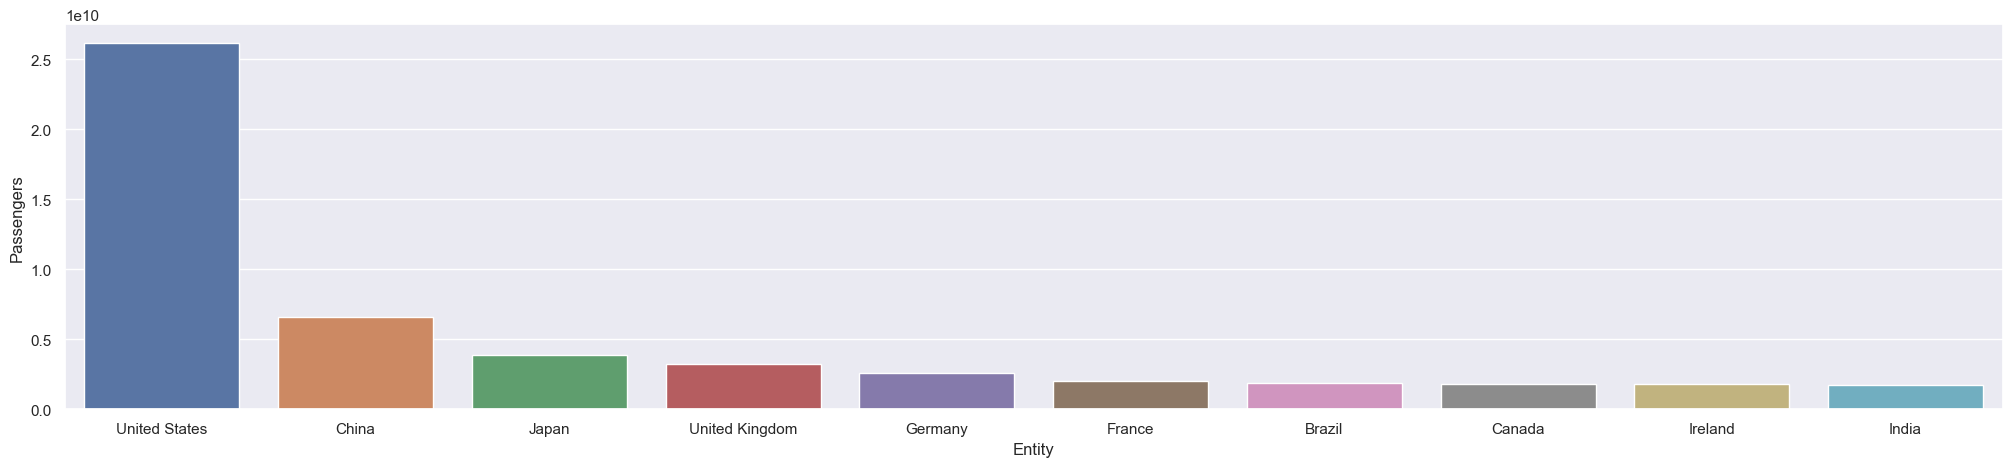

In [364]:
entity_passengers = data.groupby(["Entity"], as_index=False)["Passengers"].sum().sort_values(by="Passengers", ascending=False).head(10)

sb.barplot(x="Entity", y="Passengers", data=entity_passengers)

*The above graph shows the 10 most popular destination people liked to travel. From the graph, it is clear that people traveled to "United States". It shows the numebr of tourist from 1970 to 2020.*

<Axes: xlabel='Year', ylabel='Passengers'>

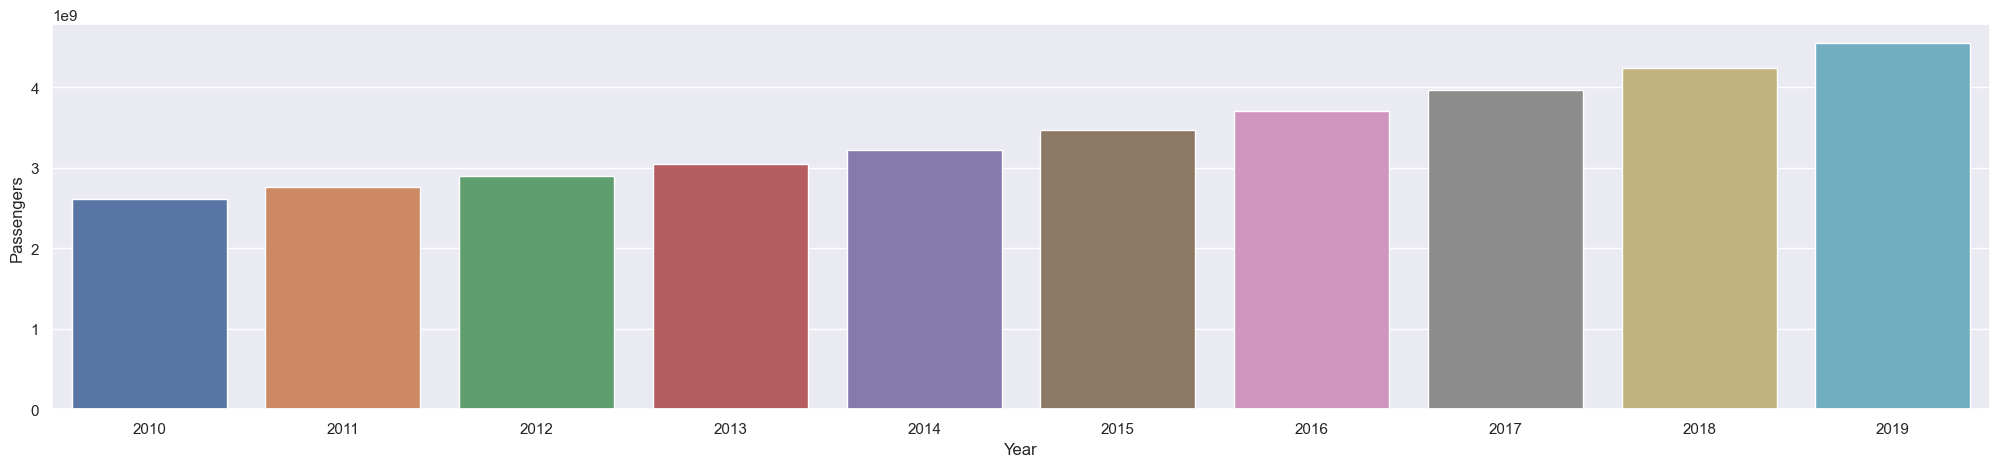

In [365]:
year_passengers = data.groupby(["Year"], as_index=False)["Passengers"].sum().sort_values(by="Passengers", ascending=False).head(10)

sb.barplot(x="Year", y="Passengers", data=year_passengers)

*The above graph shows the number of tourist per year. In 2019, people visited to foreign places the most.*

<Axes: xlabel='Entity', ylabel='Passengers'>

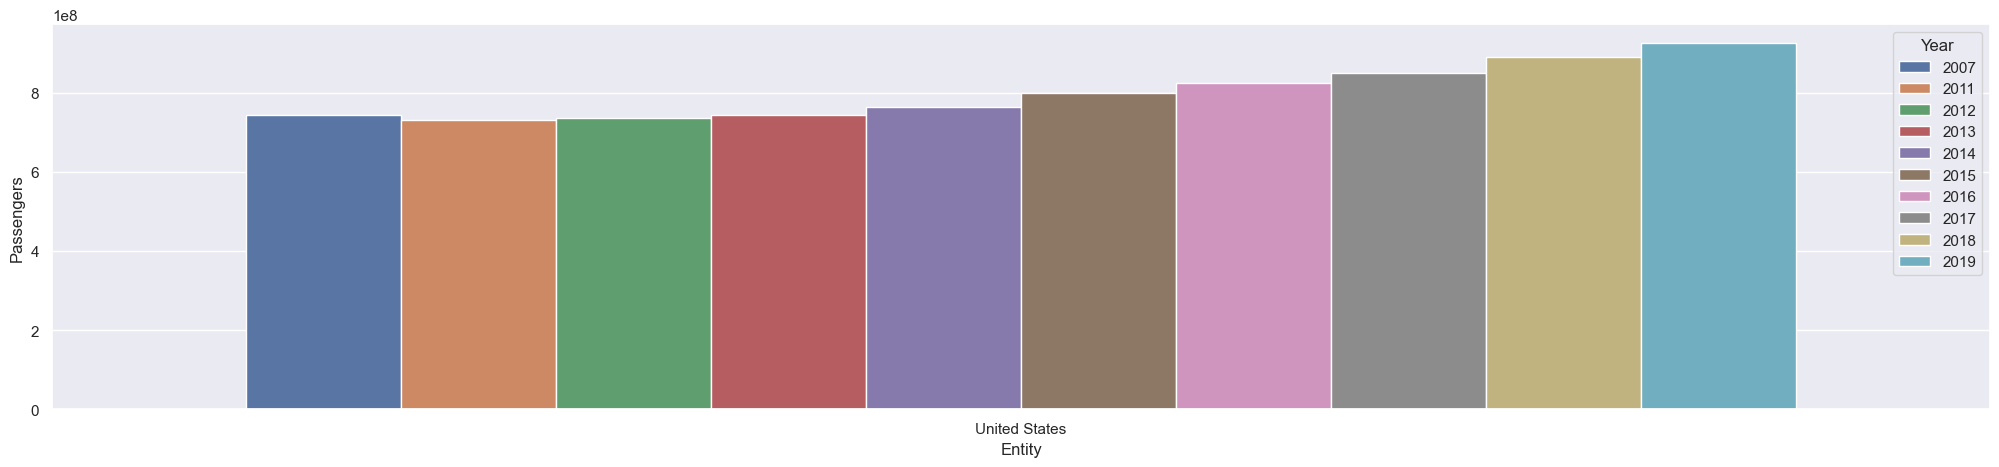

In [366]:
entity_year_passengers = data.groupby(["Entity", "Year"], as_index=False)["Passengers"].sum().sort_values(by="Passengers", ascending=False).head(10)

sb.barplot(x="Entity", y="Passengers", hue="Year", data=entity_year_passengers)

*The above graph group the number of tourist visited to a country based on the year data. Ths graph shows the 10 years in which the tourist visited the most to the "United States". The second place is "China" and so on.*

## From the above analysis, it can be said that "United States" is the most famous place amoung tourists. The number of tourist keeps on increasing every year.

*Note: All the values are shown in millions.*